# Part 3: Homography

## 1. Chessboard:

### 1.1. Supporting Functions:

Firstly, write a function that computes homography given 4 chosen points:

In [1]:
import numpy as np
import scipy.linalg as linalg
import cv2
from PIL import Image
from pylab import *
import matplotlib as mpl
import matplotlib.pyplot as plt
import yaml
import cv2

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
def getHomography(x1, x2, x3, x4, y1, y2, y3, y4):
    print(x1, x2, x3, x4, y1, y2, y3, y4)
    A = np.array([[x1[0],x1[1],1, 0,0,0, -x1[0]*y1[0],-x1[1]*y1[0],-y1[0]],
                  [0,0,0, x1[0],x1[1],1, -x1[0]*y1[1],-x1[1]*y1[1],-y1[1]],
                  [x2[0],x2[1],1, 0,0,0, -x2[0]*y2[0],-x2[1]*y2[0],-y2[0]],
                  [0,0,0, x2[0],x2[1],1, -x2[0]*y2[1],-x2[1]*y2[1],-y2[1]],
                  [x3[0],x3[1],1, 0,0,0, -x3[0]*y3[0],-x3[1]*y3[0],-y3[0]],
                  [0,0,0, x3[0],x3[1],1, -x3[0]*y3[1],-x3[1]*y3[1],-y3[1]],
                  [x4[0],x4[1],1, 0,0,0, -x4[0]*y4[0],-x4[1]*y4[0],-y4[0]],
                  [0,0,0, x4[0],x4[1],1, -x4[0]*y4[1],-x4[1]*y4[1],-y4[1]]])
#     print(A)
    U, D, Vt = linalg.svd(A)
    H = Vt[-1].reshape(3,3)
#     print(H)
    
    return H

Second of all, allow users to select points on images:

In [3]:
# %matplotlib tk
def choosePoints(img1, img2):
    %matplotlib tk
    matplotlib.use('TkAgg')

    imshow(img1, interpolation='none')
    chosenPoints1 = ginput(4) 
    print(chosenPoints1)
    
    imshow(img2, interpolation='none')
    chosenPoints2 = ginput(4) 
    print(chosenPoints2)
    
    return chosenPoints1, chosenPoints2

Third of all, involve the images with the getHomography function. So the function must be able to import the images, then compute image "matrix multiplying" with the homography.

In [4]:
def computeHomographyTransformation(img1, img2):
    imgSizeX = img1.shape[0]
    imgSizeY = img1.shape[1]
    newSizeX = img2.shape[0] 
    newSizeY = img2.shape[1]
    newImg = np.zeros((newSizeX, newSizeY, 3),np.uint8)
    
    # read the chosen points:
    chosenPts1, chosenPts2 = choosePoints(img1, img2)
    
    H = getHomography(chosenPts1[0], chosenPts1[1], chosenPts1[2], chosenPts1[3],
                      chosenPts2[0], chosenPts2[1], chosenPts2[2], chosenPts2[3])
    HInverse = np.linalg.pinv(H)
    
    for i in range(0, newSizeY):
        for j in range(0, newSizeX):
            newPos = np.array([i, j, 1])
            orgPos = HInverse.dot(newPos) # find the corresponding indexes in the original image by H^(-1)
            orgPos = orgPos/orgPos[2] # normalize the indexes
            orgPosX = int(orgPos[0]) # round the indexes to integer
            orgPosY = int(orgPos[1])
            if((orgPosX >= 0 and orgPosX < imgSizeY) and (orgPosY >= 0 and orgPosY < imgSizeX)):
                newImg[j][i] = img1[orgPosY][orgPosX]    
    
    # Draw img
    %matplotlib inline
    %config InlineBackend.figure_format = 'svg'
    plt.imshow(newImg/255)
    plt.show()

### 1.2. Project h1 to h2:

[(24.237858719646738, 40.55960264900682), (1163.8625827814571, 40.55960264900682), (46.312913907284724, 1147.0717439293599), (1161.1032008830025, 1163.6280353200884)]
[(40.5163148454746, 207.20686166298754), (469.7519660596027, 22.284584253127377), (384.71471440397346, 531.1582965415747), (797.7527938741723, 288.19472038263433)]
(24.237858719646738, 40.55960264900682) (1163.8625827814571, 40.55960264900682) (46.312913907284724, 1147.0717439293599) (1161.1032008830025, 1163.6280353200884) (40.5163148454746, 207.20686166298754) (469.7519660596027, 22.284584253127377) (384.71471440397346, 531.1582965415747) (797.7527938741723, 288.19472038263433)


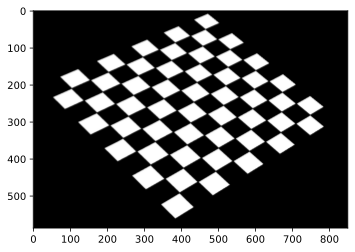

In [5]:
# Testing block
img1 = cv2.imread('h1.jpg')
img2 = cv2.imread('h2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
computeHomographyTransformation(img1, img2)

### 1.3. Project h1 to h2:

[(55.364088944076514, 211.25625459896986), (468.4021684142752, 34.43276306107441), (369.86694030537154, 525.759105960265), (789.6540080022075, 301.6926968359088)]
[(38.034768211920436, 62.63465783664469), (1136.2687637969098, 62.63465783664469), (60.10982339955842, 1158.109271523179), (1166.621964679912, 1136.0342163355408)]
(55.364088944076514, 211.25625459896986) (468.4021684142752, 34.43276306107441) (369.86694030537154, 525.759105960265) (789.6540080022075, 301.6926968359088) (38.034768211920436, 62.63465783664469) (1136.2687637969098, 62.63465783664469) (60.10982339955842, 1158.109271523179) (1166.621964679912, 1136.0342163355408)


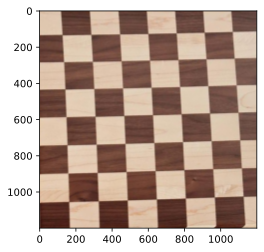

In [7]:
# Testing block
img1 = cv2.imread('h1.jpg')
img2 = cv2.imread('h2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
computeHomographyTransformation(img2, img1)

## 2. Simpsons:

Now, for the Simpsons case:

### 2.1. Supporting Functions:

In [ ]:
def getMinMax(array):
    minX = np.min(array[0,:])
    minY = np.min(array[1,:])
    maxX = np.max(array[0,:])
    maxY = np.max(array[1,:])
    return minX, minY, maxX, maxY

In [9]:
def computeHomographyAndConcat(img1, img2):
    imgSizeX = img1.shape[0]
    imgSizeY = img1.shape[1]
    newSizeX = img2.shape[0] 
    newSizeY = img2.shape[1]
    newImg = img2
    
    # read the chosen points:
    chosenPts1, chosenPts2 = choosePoints(img1, img2)
    
    H = getHomography(chosenPts1[0], chosenPts1[1], chosenPts1[2], chosenPts1[3],
                      chosenPts2[0], chosenPts2[1], chosenPts2[2], chosenPts2[3])
    HInverse = np.linalg.pinv(H)

    
    for i in range(0, newSizeY):
        for j in range(0, newSizeX):
            newPos = np.array([i, j, 1])
            orgPos = HInverse.dot(newPos) # find the corresponding indexes in the original image by H^(-1)
            orgPos = orgPos/orgPos[2] # normalize the indexes
            orgPosX = int(orgPos[0]) # round the indexes to integer
            orgPosY = int(orgPos[1])
            if((orgPosX >= 0 and orgPosX < imgSizeY) and (orgPosY >= 0 and orgPosY < imgSizeX)):
                newImg[j][i] = img1[orgPosY][orgPosX]       
                
    # Draw img
    %matplotlib inline
    %config InlineBackend.figure_format = 'svg'
    plt.imshow(newImg/255)
    plt.show()

### 2.2. Project Simpsons Image to the Side of the Bus:

[(46.012831125827915, 16.332229580573994), (901.4212196467995, 33.578366445916345), (66.70819536423846, 1447.7615894039736), (891.0735375275942, 1420.1677704194262)]
[(586.6612283848419, 209.2744665194997), (794.980764808683, 242.34105960264912), (613.1145028513614, 501.91381530537166), (798.287424116998, 453.9672553348051)]
(46.012831125827915, 16.332229580573994) (901.4212196467995, 33.578366445916345) (66.70819536423846, 1447.7615894039736) (891.0735375275942, 1420.1677704194262) (586.6612283848419, 209.2744665194997) (794.980764808683, 242.34105960264912) (613.1145028513614, 501.91381530537166) (798.287424116998, 453.9672553348051)


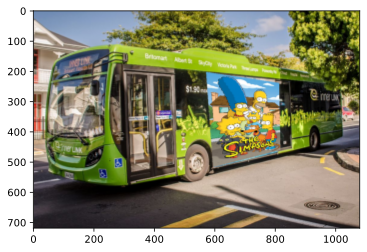

In [10]:
# Testing block
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
imgSimpsons = cv2.imread('simpsons.jpg')
imgSimpsons = cv2.cvtColor(imgSimpsons, cv2.COLOR_BGR2RGB)
imgBus = cv2.imread('bus.jpg')
imgBus = cv2.cvtColor(imgBus, cv2.COLOR_BGR2RGB)
computeHomographyAndConcat(imgSimpsons, imgBus)

In [ ]:
# # Testing block:
# array = np.array([[3,1,1,11,-11,3,-7],[-1,0,1,19,21,-100,0],[1,1,1,1,1,1,1]])
# print(getMinMax(array))

In [ ]:
# # Testing block
# # img1 = Image.open('h1.jpg'), cv2.COLOR_BGR2RGB
# # img2 = Image.open('h2.jpg'), cv2.COLOR_BGR2RGB
# # arrImg1 = np.array(img1.convert('L'),'f')
# # arrImg2 = np.array(img2.convert('L'),'f')
# arrImg1 = np.array(Image.open('h1.jpg').convert('L'),'f')
# arrImg2 = np.array(Image.open('h2.jpg').convert('L'),'f')
# # arrImg1 = cv2.cvtColor(arrImg1, cv2.COLOR_BGR2RGB) # Working
# # arrImg2 = cv2.cvtColor(arrImg2, cv2.COLOR_BGR2RGB) # Not Working

# # arrImg1 = np.array(img1.convert('L'),'f')
# # arrImg2 = np.array(img2.convert('L'),'f')
# computeHomographyTransformation(arrImg1, arrImg2)
# # arrImg1 = np.array(Image.open('h1.jpg').convert('L'),'f')
# # arrImg2 = np.array(Image.open('h2.jpg').convert('L'),'f')
# # computeHomographyTransformation(img1, img2)

In [ ]:
# arrImg1 = np.array(Image.open('h1.jpg').convert('L'),'f')
# arrImg2 = np.array(Image.open('h2.jpg').convert('L'),'f')
# computeHomographyTransformation(arrImg2, arrImg1)

In [ ]:
# import matplotlib
# %matplotlib tk

# matplotlib.use('TkAgg')

# img1 = Image.open('h1.jpg')
# arrImg1 = np.array(img1)
# imshow(img1)

# chosenPoints1 = ginput(4) 
# print(chosenPoints1)


In [ ]:
# img2 = Image.open('h2.jpg')
# arrImg2 = np.array(img2)
# imshow(img2)

# chosenPoints2 = ginput(4) 
# print(chosenPoints2)

In [ ]:
# # Testing block:
# # getHomography(np.array([11, 12]), np.array([21, 22]), np.array([31,32]), np.array([41,42]), 
# #               np.array([110, 120]), np.array([210, 220]), np.array([310,320]), np.array([410, 420]))
# # x_1 = [93,-7]
# # y_1 = [63,0]
# # x_2 = [293,3]
# # y_2 = [868,-6]
# # x_3 = [1207,7]
# # y_3 = [998,-4]
# # x_4 = [1218,3]
# # y_4 = [309,2]

# x_1 = [93,63]
# y_1 = [-7,0]
# x_2 = [293,868]
# y_2 = [3,-6]
# x_3 = [1207,998]
# y_3 = [7,-4]
# x_4 = [1218,309]
# y_4 = [3,2]
# H = getHomography(x_1, x_2, x_3, x_4, y_1, y_2, y_3, y_4)
# print(H)
# y_t = np.matmul(H, np.array([93,63,1]))
# y_t = y_t/y_t[2]
# print(y_t)
# y_t = np.matmul(H, np.array([293,868,1]))
# y_t = y_t/y_t[2]
# print(y_t)
# y_t = np.matmul(H, np.array([1207,998,1]))
# y_t = y_t/y_t[2]
# print(y_t)
# y_t = np.matmul(H, np.array([1218,309,1]))
# y_t = y_t/y_t[2]
# print(y_t)

In [ ]:
# # Testing block:
# x_1 = [93,-7]
# y_1 = [63,0]
# x_2 = [293,3]
# y_2 = [868,-6]
# x_3 = [1207,7]
# y_3 = [998,-4]
# x_4 = [1218,3]
# y_4 = [309,2]
# P = np.array([
#     [-x_1[0], -y_1[0], -1, 0, 0, 0, x_1[0]*x_1[1], y_1[0]*x_1[1], x_1[1]],
#     [0, 0, 0, -x_1[0], -y_1[0], -1, x_1[0]*y_1[1], y_1[0]*y_1[1], y_1[1]],
#     [-x_2[0], -y_2[0], -1, 0, 0, 0, x_2[0]*x_2[1], y_2[0]*x_2[1], x_2[1]],
#     [0, 0, 0, -x_2[0], -y_2[0], -1, x_2[0]*y_2[1], y_2[0]*y_2[1], y_2[1]],
#     [-x_3[0], -y_3[0], -1, 0, 0, 0, x_3[0]*x_3[1], y_3[0]*x_3[1], x_3[1]],
#     [0, 0, 0, -x_3[0], -y_3[0], -1, x_3[0]*y_3[1], y_3[0]*y_3[1], y_3[1]],
#     [-x_4[0], -y_4[0], -1, 0, 0, 0, x_4[0]*x_4[1], y_4[0]*x_4[1], x_4[1]],
#     [0, 0, 0, -x_4[0], -y_4[0], -1, x_4[0]*y_4[1], y_4[0]*y_4[1], y_4[1]],
#     ])

# [U, S, Vt] = np.linalg.svd(P)
# homography = Vt[-1].reshape(3, 3)
# print(homography)
# # transformedPoint = homography @ np.array([1679,  128, 1]).transpose()
# # print(transformedPoint/transformedPoint[-1]) # will be ~[4, 7, 1]